## Breast Cancer Classification

The data used in this notebook is taken from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)
In this jupyter notebook I explore different methods of visualisation as well as how this can be used to train various machine learning classification algorithms. This example uses a number of features of breast cancer tumours to classify whether the tumour is benign or malignant. 

In [103]:
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Data Challenge Week 5/breast-cancer-wisconsin.data', 
                  names=['id number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                         'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
                         'Normal Nucleoli', 'Mitoses', 'Class'], header=None)
data = data.set_index('id number') #here I set the index to the patient ID number

The data has a number of features for each patient (given by the id number). Below is a clipping of how the data looks. Each feature ranges from 0-10 and 'Class' refers to the whether the tumour is benign (2), or malignant (4). Since I have this information on the class of each tumour, I can say that the data is *labelled*.

In [21]:
# data = data.replace('?', 0) #there are some question marks given for missing values. I replace these with 0  
data2 = data.convert_objects(convert_numeric=True)
data2.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Pandas can be used to create summary statistics on the data using the function ```describe()```

In [23]:
data2.describe() 

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


I can calculate a correlation matrix between all the different features to see which are correlated with each other

In [24]:
data2.corr() 

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


This is quite hard to read, and so instead it is better to look at a visual representation. I use ```sns.heatmap()``` for this. Here the high correlations are a darker colour. For this data there are no negative correlations, but if there were it is best to use a diverging colourmap

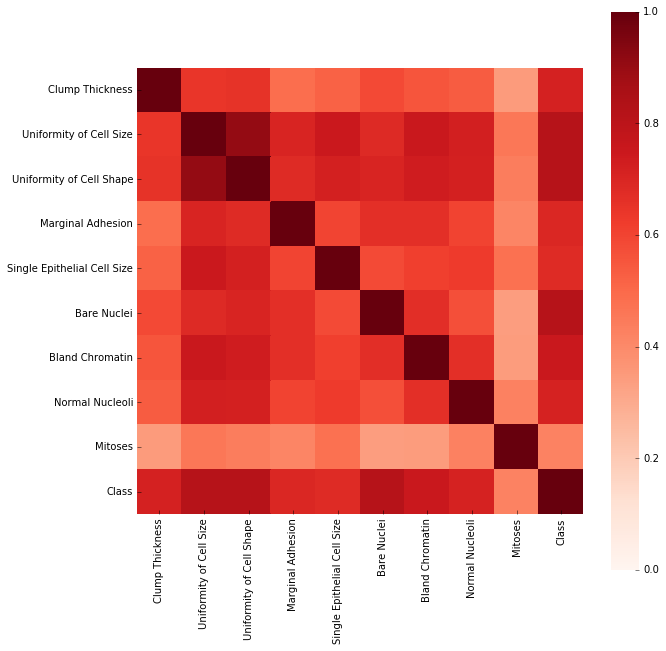

In [42]:
corr = data2.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Reds', vmin=0, vmax=1, 
            square=True)

If I want to order the correlations to see which are most important I can use ```sns.clustermap()```

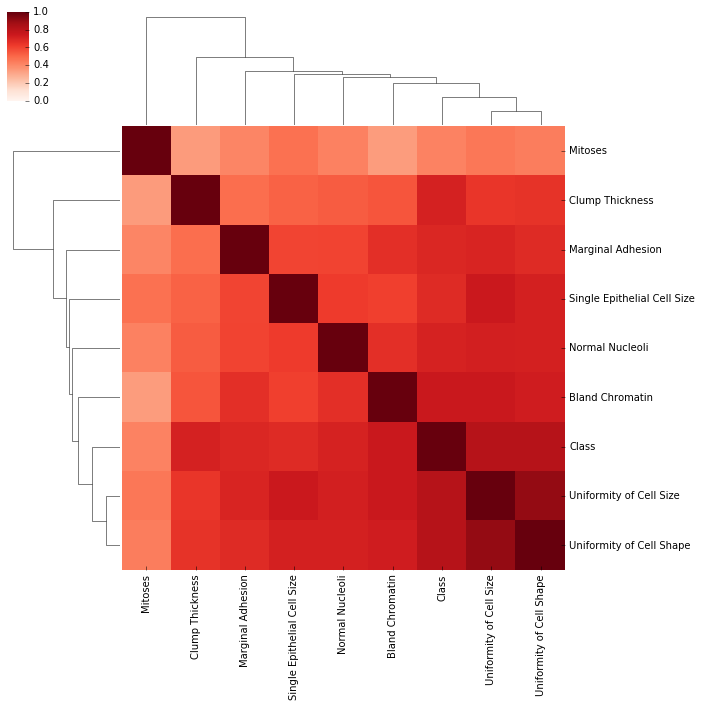

In [44]:
sns.clustermap(data.corr(), cmap='Reds', vmin=0, vmax=1)

This tells me the amount each feature is correlated with all the others, but what if I want to know how that correlation looks? I can use ```sns.pairplot()``` to visualise this. Here I know that my data is labelled with the 'Class' of the tumour (ie. whether it is benign or malignant) and so I can use the 'Class' feature to split the data further into blue and orange. The top and bottom now show all iterations of scatter plots, with the diagonal a histogram showing the individual distribution of each feature  

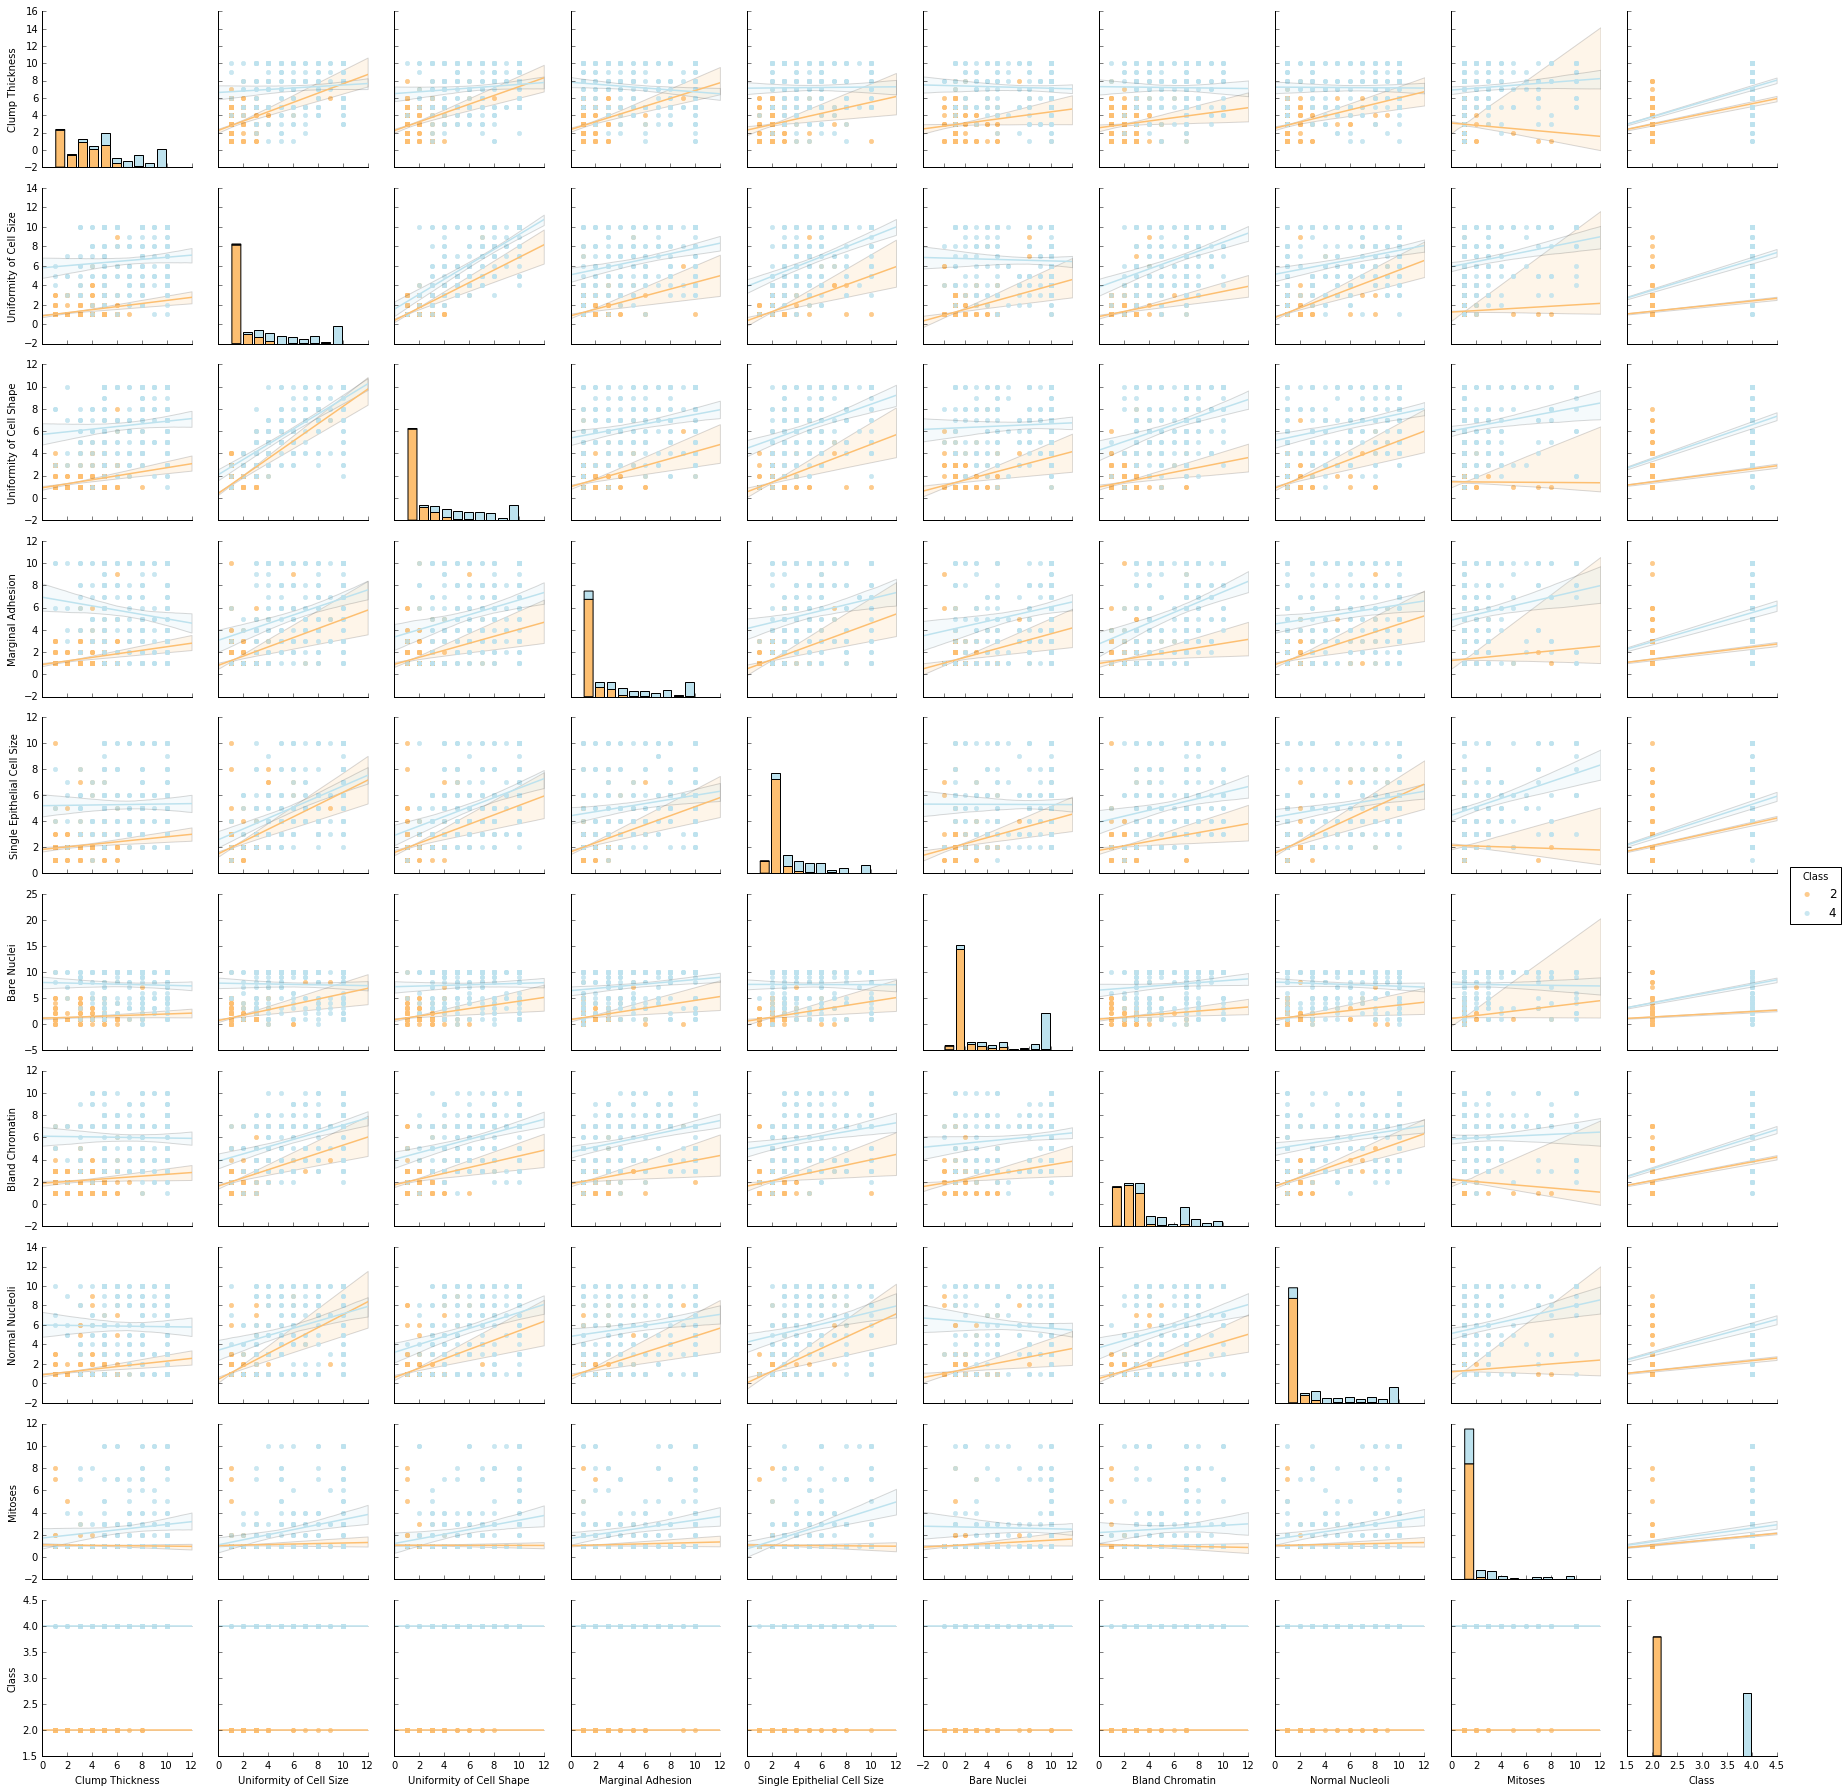

In [22]:
grid = sns.pairplot(data2, hue='Class', kind="reg", palette = 'RdYlBu')

From this we can see that plotting a straight line to each correlation isn't necessarily the best way to look at information. Additionally we can see that some features have much smaller centre quartiles than others (shown by the shaded areas). 
The histograms also give us valuable information as it is clear that there is a large skew towards zero for all of them

## Machine Learning Classifiers
Now that I've briefly visualised the data, can I use this to look at different classification algorithms. Since the data is labelled, this is *supervised learning*.

First I need to split my data into the training and test sets:

In [69]:
X = data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                         'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
                         'Normal Nucleoli', 'Mitoses']]
y = data[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
# 75% training and 25% test

### Logistic Regression
To start we will use a simple logistic regression. Logistic regression assumes that the features are independent of each other; that is, there is no correlation between any of them. I know from my initial analysis that this is not the case, however this is still a good starting point. 

In [110]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred1 = logisticRegr.predict(X_test)

accuracy = metrics.accuracy_score(y_pred1, y_test)
print(accuracy)

0.9657142857142857


To assess the model I can also look at the confusion matrix of the model. This looks at the false positive vs false negative results. 

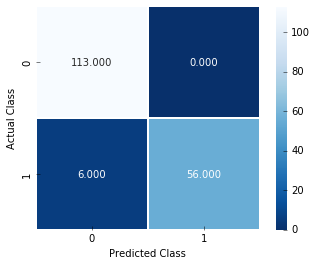

In [111]:
cm = metrics.confusion_matrix(y_test, y_pred1)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax)
ax.set_ylabel('Actual Class')
ax.set_xlabel('Predicted Class')

The top right box gives my number of 'False positives'; that is the number of times I predict cancer, when actually it is not there. Here this is zero. 
The bottom left then gives the number of 'False negatives': the number of times I predict there is no cancer but in fact there is. This is non-zero, giving a value of 6. You have to weigh up which of these is more important. Is it better to reduce false positives or false negatives? 
It can also be more useful to show this matrix as a percentage of the total number of positives and negatives:

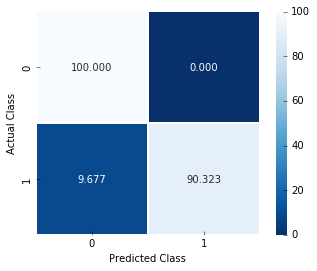

In [116]:
cm_percentage = np.zeros((2,2))
cm_percentage[0] = cm[0]/np.float(np.sum(cm[0]))
cm_percentage[1] = cm[1]/np.float(np.sum(cm[1]))

fig, ax = plt.subplots()
sns.heatmap((cm_percentage*100), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax)
ax.set_ylabel('Actual Class')
ax.set_xlabel('Predicted Class')

Here we can see that I predict a negative result correctly 100% of the time and a positive result correctly 90% of the time. My false positive rate is 0% and my false negative result is 0.97%

### Naive Bayes
Naive Bayes is another classification algorithm which assumes that the features ar independent of each other. 
In this model, 'Naive' refers to the fact that this is often untrue.

In [105]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred3 = mnb.predict(X_test)

accuracy = metrics.accuracy_score(y_pred3, y_test)
print(accuracy)

0.8971428571428571


Here the accuracy is greatly reduced, and so this is not a good model to use.

### K-Nearest Neighbours
KNN is a classification algorithm for labelled data. KNN requires all the features to be on the same scale, which it already is in our case (all features go from 0-10). KNN labels data based on the labels of the nearest points. 

In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_pred2, y_test)
print(accuracy)

0.9714285714285714


Although this accuracy is already very high, the results which by strongly dependent on the number of neighbours that you pick (the default with sklearn is ```n_neighbors=5```). We can look at our accuracy as a function of this parameter to see what the best number is. 

Best k = 1
Max Accuracy =  0.97


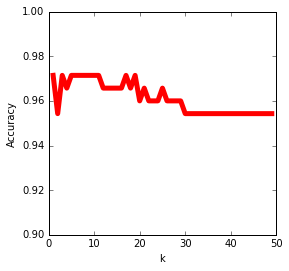

In [61]:
accuracy_list=[]
for k in range(1,50): #we ignore k=1
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_pred, y_test))
    
fig, ax = plt.subplots()
ax.plot(range(1,50), accuracy_list, c='red', lw=5)
ax.set_ylim(0.9, 1)
ax.set_aspect(49/0.1)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
print'Best k =',np.argmax(accuracy_list)+1
print 'Max Accuracy = ', max(accuracy_list).round(2)

Here we can see that by chance we have maximised our accuracy with the default value of k=5. However this is not always the case and so it is important to check.